# Function haarmatrix

## Synopse

Compute the Kernel matrix for the Haar Transform.
The Haar transform is a particular case of discrete wavelet transform.

- **A = haarmatrix(N)**

  - **A**:output: haar matrix NxN. 
  - **N**:input: matrix size (NxN). 

In [2]:
import numpy as np

def haarmatrix(N):
    n = np.floor(np.log(N)/np.log(2))

    if 2**n != N: raise Exception('error: size '+str(N)+' is not multiple of power of 2')

    z = np.resize(1.*np.arange(N)/N, (len(1.*np.arange(N)), len(1.*np.arange(N)/N)))
    k = np.transpose(np.resize(1.*np.arange(N), (len(1.*np.arange(N)/N), len(1.*np.arange(N)))))
    
    
    p  = np.floor(np.log(np.maximum(1,k))/np.log(2))
    q  = k - (2**p) + 1
    z1 = (q-1)   / (2**p)
    z2 = (q-0.5) / (2**p)
    z3 = q       / (2**p)
    A  = (1/np.sqrt(N)) * ((( 2**(p/2.)) * ((z >= z1) & (z < z2))) + ((-2**(p/2.)) * ((z >= z2) & (z < z3))))
    A[0,:] = 1/np.sqrt(N)
    return A

## Examples

In [1]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python haarmatrix.ipynb
    import numpy as np
    import sys,os
    import matplotlib.image as mpimg
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia


[NbConvertApp] Converting notebook haarmatrix.ipynb to python
[NbConvertApp] Writing 2354 bytes to haarmatrix.py


### Example 1

In [2]:
if testing:
    np.set_printoptions(suppress=True, precision=4)
    A = ia.haarmatrix(4)
    print('Visualiza matriz haar 4x4:\n',A)
    B = np.dot(A,np.transpose(A))
    print("\nVisualiza propriedade A*A'= I:\n", B)


Visualiza matriz haar 4x4:
 [[ 0.5     0.5     0.5     0.5   ]
 [ 0.5     0.5    -0.5    -0.5   ]
 [ 0.7071 -0.7071  0.      0.    ]
 [ 0.      0.      0.7071 -0.7071]]

Visualiza propriedade A*A'= I:
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


### Example 2

""
Haar matrix 128x128

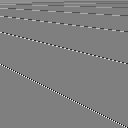

In [3]:
if testing:
    
    A = ia.haarmatrix(128)
    ia.adshow(ia.normalize(A),'Haar matrix 128x128')

### Example 3

""
Imagem original
""
Haar transform

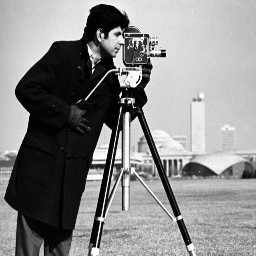
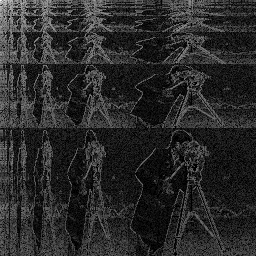

In [4]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    
    A = ia.haarmatrix(f.shape[0])
    B = ia.haarmatrix(f.shape[1])
    F = np.dot(np.dot(A, f), np.transpose(B))
    
    nb = ia.nbshow(2)
    nb.nbshow(f,'Imagem original')
    nb.nbshow(ia.normalize(np.log(abs(F)+1)),'Haar transform')
    nb.nbshow()